<a href="https://colab.research.google.com/github/chandraSekar123/ML_Deployment_Django/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from IPython.display import Image
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
%matplotlib inline

In [0]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [0]:
df = pd.read_csv("decisiontree.csv")


In [23]:
df.head()


,Score,Pass
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [24]:
df.tail()



,Score,Pass
95,96,1
96,97,1
97,98,1
98,99,1
99,100,1


In [0]:
X_train = df.loc[:, df.columns != 'Pass']
Y_train = df.Pass

In [40]:
Y_train.unique()

array([0, 1])

In [65]:
## chandra code for checking the logic
count=len(Y_train)
col_values=Y_train.unique()
def chandra_entropy(df,targetcol):
  total_entro=0
  for i in col_values:

    
    len1=len(df[df[targetcol]==i])
    ent1=-len1/count*np.log2(len1/count)
    print(i,len1,count,ent1)
    total_entro=total_entro+ ent1
  return total_entro




chandra_entropy(df,"Pass")

0 39 100 0.5297970486558657
1 61 100 0.43500249984922146


0.9647995485050872

In [0]:

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    for (e, c) in zip(elements, counts):
        print("Node has {} elements of Class {}".format(c, e))
    entropy = np.sum(
        [
            (-counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts))
            for i in range(len(elements))
        ]
    )
    return entropy

In [27]:
entropy_before_split = entropy(df.Pass)
print ("Initial Entropy = {}".format(entropy_before_split))

Node has 39 elements of Class 0
Node has 61 elements of Class 1
Initial Entropy = 0.9647995485050872


In [28]:

split_values = np.arange(1.5,100,1)
split_values

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
       12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5,
       23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5,
       34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5,
       45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5,
       56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5,
       67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5, 77.5,
       78.5, 79.5, 80.5, 81.5, 82.5, 83.5, 84.5, 85.5, 86.5, 87.5, 88.5,
       89.5, 90.5, 91.5, 92.5, 93.5, 94.5, 95.5, 96.5, 97.5, 98.5, 99.5])

In [0]:
left_node_data = df.loc[df.Score < split_values[0]]
right_node_data = df.loc[df.Score > split_values[0]]

In [30]:
left_node_data

,Score,Pass
0,1,0


In [31]:
right_node_data



,Score,Pass
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
...,...,...
95,96,1
96,97,1
97,98,1
98,99,1


In [0]:
def calc_info_gain_numeric(df, left, right, entropy_before_split, split_values):
    print("Split Value = {} \n".format(split_values))
    total_elements = df.shape[0]
    print("Left Node")
    ent_left = entropy(left)
    print("Entropy of Left Node {} \n".format(ent_left))
    print("Right Node")
    ent_right = entropy(right)
    print("Entropy of Right Node {} \n".format(ent_right))
    weighted_entropy = ((left.shape[0] / total_elements) * ent_left) + (
        (right.shape[0] / total_elements) * ent_right
    )
    info_gain = entropy_before_split - weighted_entropy
    print("Info gain at split {} is {} \n".format(split_values, info_gain))
    return info_gain

In [33]:
calc_info_gain_numeric(
    df, left_node_data.Pass, right_node_data.Pass, entropy_before_split, split_values[0]
)

Split Value = 1.5 

Left Node
Node has 1 elements of Class 0
Entropy of Left Node 0.0 

Right Node
Node has 38 elements of Class 0
Node has 61 elements of Class 1
Entropy of Right Node 0.9607079018756469 

Info gain at split 1.5 is 0.013698725648196741 



0.013698725648196741

In [34]:

info_gains = []
for sp_value in split_values:
    left_data = df.loc[df.Score < sp_value]
    right_data = df.loc[df.Score > sp_value]
    info_gains.append(
        calc_info_gain_numeric(
            df, left_data.Pass, right_data.Pass, entropy_before_split, sp_value
        )
    )

Split Value = 1.5 

Left Node
Node has 1 elements of Class 0
Entropy of Left Node 0.0 

Right Node
Node has 38 elements of Class 0
Node has 61 elements of Class 1
Entropy of Right Node 0.9607079018756469 

Info gain at split 1.5 is 0.013698725648196741 

Split Value = 2.5 

Left Node
Node has 2 elements of Class 0
Entropy of Left Node 0.0 

Right Node
Node has 37 elements of Class 0
Node has 61 elements of Class 1
Entropy of Right Node 0.9562940061600327 

Info gain at split 2.5 is 0.02763142246825523 

Split Value = 3.5 

Left Node
Node has 3 elements of Class 0
Entropy of Left Node 0.0 

Right Node
Node has 36 elements of Class 0
Node has 61 elements of Class 1
Entropy of Right Node 0.9515388458648667 

Info gain at split 3.5 is 0.04180686801616651 

Split Value = 4.5 

Left Node
Node has 4 elements of Class 0
Entropy of Left Node 0.0 

Right Node
Node has 35 elements of Class 0
Node has 61 elements of Class 1
Entropy of Right Node 0.9464220508835532 

Info gain at split 4.5 is 0.056

In [35]:
info_gains.index(max(info_gains))


38

In [36]:
split_values[info_gains.index(max(info_gains))]


39.5

In [0]:
clf = tree.DecisionTreeClassifier(criterion='entropy')


In [0]:
clf = clf.fit(X_train,Y_train)


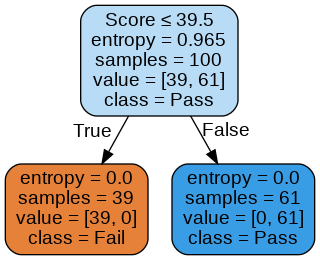

In [39]:
plot_decision_tree(clf, X_train.columns,["Fail", "Pass"])
